# Importation des BD

In [116]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.offline as pyo
import numpy as np
import scipy
from statsmodels.stats import weightstats
import seaborn as sns

In [117]:
gender = pd.read_csv("D:/Simplon/Brief projet/Titanic/gender_submission.csv")
test = pd.read_csv("D:/Simplon/Brief projet/Titanic/test.csv")
train = pd.read_csv("D:/Simplon/Brief projet/Titanic/train.csv")

# Analyse des données

In [118]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
trainn = train.drop_duplicates()
doublons = train.shape[0] - trainn.shape[0]
doublons_pct = doublons/train.shape[0]*100
print("Il y a", doublons, ", soit", round(doublons_pct, 4), "% de doublons dans la table Train.")

Il y a 0 , soit 0.0 % de doublons dans la table Train.


In [120]:
print(train.isnull().sum()/train.shape[0]*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [121]:
train["Age"].fillna(train["Age"].mean(), inplace = True)
del train["Cabin"]
train.dropna(inplace= True)

In [122]:
print(train.isnull().sum()/train.shape[0]*100)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


# DATAVIZ

In [123]:
train.Survived.groupby(train.Sex).value_counts()

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [124]:
labels1 = train.Sex[train.Survived == 0].groupby(train.Sex).count().index
labels2 = train.Sex[train.Survived == 1].groupby(train.Sex).count().index
values1 = train.Sex[train.Survived == 0].groupby(train.Sex).count().values
values2 = train.Sex[train.Survived == 1].groupby(train.Sex).count().values

fig1 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction du sexe"
# Change the bar mode
fig1.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig1.show()

In [125]:
train.Survived.groupby(train.Pclass).value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [126]:
labels1 = train.Pclass[train.Survived == 0].groupby(train.Pclass).count().index
labels2 = train.Pclass[train.Survived == 1].groupby(train.Pclass).count().index
values1 = train.Pclass[train.Survived == 0].groupby(train.Pclass).count().values
values2 = train.Pclass[train.Survived == 1].groupby(train.Pclass).count().values


fig2 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction de la classe de ticket"
# Change the bar mode
fig2.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig2.show()

In [127]:
train.Survived.groupby(train.Embarked).value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [128]:
def legend_embarked(liste) :
    L = liste.to_list()
    for k in range(len(L)) :
        if L[k] == "C" :
            L[k] = "Cherbourg"
        elif L[k] == "Q" :
            L[k] = "Queenstown"
        elif L[k] == "S" :
            L[k] = "Southampton"
    return L

In [129]:
labels1 = train.Embarked[train.Survived == 0].groupby(train.Embarked).count().index
labels2 = train.Embarked[train.Survived == 1].groupby(train.Embarked).count().index
values1 = train.Embarked[train.Survived == 0].groupby(train.Embarked).count().values
values2 = train.Embarked[train.Survived == 1].groupby(train.Embarked).count().values

fig3 = go.Figure(data=[
    go.Bar(name='Morts', x=legend_embarked(labels1), y=values1),
    go.Bar(name='En vie', x=legend_embarked(labels2), y=values2)
])

title = "Etat des passager en fonction du point d'embarquement"
# Change the bar mode
fig3.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig3.show()

In [130]:
def process_age(df, cut_points, labels) :
    df["Age_categorie"] = pd.cut(df["Age"], cut_points, labels = labels)
    return df

cut_points = [0, 5, 18, 30, 60, 100]
labels = ["Baby", "Child", "Junior", "Adult", "Senior"]

train = process_age(train, cut_points, labels)

In [131]:
train.Survived.groupby(train.Age_categorie).value_counts()

Age_categorie  Survived
Baby           1            31
               0            13
Child          0            56
               1            39
Junior         0           299
               1           148
Adult          0           164
               1           118
Senior         0            17
               1             4
Name: Survived, dtype: int64

In [132]:
train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count()

Age_categorie
Baby       13
Child      56
Junior    299
Adult     164
Senior     17
Name: Age, dtype: int64

In [133]:
labels1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().index
labels2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().index
values1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().values
values2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().values


fig4 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction de leur âge"
# Change the bar mode
fig4.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig4.show()

In [134]:
train.Age.groupby(train.Age_categorie).count()

Age_categorie
Baby       44
Child      95
Junior    447
Adult     282
Senior     21
Name: Age, dtype: int64

In [135]:
labels1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().index
labels2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().index
values1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().values
values2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().values


fig5 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction de leur âge"
# Change the bar mode
fig5.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig5.show()

In [136]:
train.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [137]:
def process_fare(df, cut_points, labels) :
    df["Fare_categorie"] = pd.cut(df["Fare"], cut_points, labels = labels)
    return df

cut_points = [0, 8, 15, 30, 1000]
labels = ["Cheap", "Low", "High", "Expensive"]

train = process_fare(train, cut_points, labels)

In [138]:
train.Survived.groupby(train.Fare_categorie).value_counts()

Fare_categorie  Survived
Cheap           0           175
                1            51
Low             0           155
                1            62
High            0           107
                1            92
Expensive       1           134
                0            98
Name: Survived, dtype: int64

In [139]:
labels1 = train.Fare[train.Survived == 0].groupby(train.Fare_categorie[train.Survived == 0]).count().index
labels2 = train.Fare[train.Survived == 1].groupby(train.Fare_categorie[train.Survived == 1]).count().index
values1 = train.Fare[train.Survived == 0].groupby(train.Fare_categorie[train.Survived == 0]).count().values
values2 = train.Fare[train.Survived == 1].groupby(train.Fare_categorie[train.Survived == 1]).count().values


fig6 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction du prix du ticket"
# Change the bar mode
fig6.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig6.show()

In [140]:
a = train.Fare.groupby(train.Embarked).mean()
a

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [141]:
title = "Moyenne des tarifs par lieu d'embarquement"

fig7 = px.bar(a, x = legend_embarked(a.index), y = a.values, title = {'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig7.show()

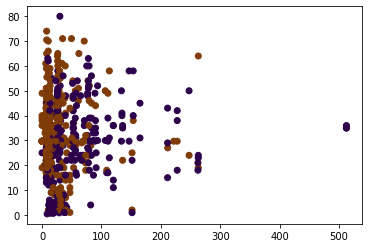

In [143]:
fig8 = plt.scatter(train['Fare'], train['Age'], c=train['Survived'], cmap="PuOr")
fig8

# DASH

In [150]:
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 234-694-992
Debugger PIN: 234-694-992
Debugger PIN: 234-694-992
Debugger PIN: 234-694-992
Debugger PIN: 234-694-992
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

In [148]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd
import pathlib

from dash.dependencies import Input, Output, State
from scipy import stats

group_colors = {"control": "light blue", "reference": "red"}

app = dash.Dash(
    __name__, meta_tags=[{"name": "viewport", "content": "width=device-width"}]
)
server = app.server

# App Layout
app.layout = html.Div(
    children=[
        # Error Message
        html.Div(id="error-message"),
        # Top Banner
        html.Div(
            className="study-browser-banner row",
            children=[
                html.H2(className="h2-title", children="ANIMAL STUDY BROWSER"),
                html.Div(
                    className="div-logo",
                    children=html.Img(
                        className="logo", src=app.get_asset_url("dash-logo-new.png")
                    ),
                ),
                html.H2(className="h2-title-mobile", children="ANIMAL STUDY BROWSER"),
            ],
        ),
        # Body of the App
        html.Div(
            className="row app-body",
            children=[
                # User Controls
                html.Div(
                    className="four columns card",
                    children=[
                        html.Div(
                            className="bg-white user-control",
                            children=[
                                html.Div(
                                    className="padding-top-bot",
                                    children=[
                                        html.H6("Test Articles"),
                                        dcc.Dropdown(id="study-dropdown"),
                                    ],
                                ),
                                html.Div(
                                    className="padding-top-bot",
                                    children=[
                                        html.H6("Choose the type of plot"),
                                        dcc.RadioItems(
                                            id="chart-type",
                                            options=[
                                                {"label": "Box Plot", "value": "box"},
                                                {
                                                    "label": "Violin Plot",
                                                    "value": "violin",
                                                },
                                            ],
                                            value="violin",
                                            labelStyle={
                                                "display": "inline-block",
                                                "padding": "12px 12px 12px 0px",
                                            },
                                        ),
                                    ],
                                ),
                                html.Div(
                                    className="padding-top-bot",
                                    children=[
                                        html.H6("CSV File"),
                                        dcc.Upload(
                                            id="upload-data",
                                            className="upload",
                                            children=html.Div(
                                                children=[
                                                    html.P("Drag and Drop or "),
                                                    html.A("Select Files"),
                                                ]
                                            ),
                                            accept=".csv",
                                        ),
                                    ],
                                ),
                            ],
                        )
                    ],
                ),
                # Graph
                html.Div(
                    className="eight columns card-left",
                    children=[
                        html.Div(
                            className="bg-white",
                            children=[
                                html.H5("Animal data plot"),
                                dcc.Graph(id="plot"),
                            ],
                        )
                    ],
                ),
                dcc.Store(id="error", storage_type="memory"),
            ],
        ),
    ]
)

# Callback to generate error message
# Also sets the data to be used
# If there is an error use default data else use uploaded data
@app.callback(
    [
        Output("error", "data"),
        Output("error-message", "children"),
        Output("study-dropdown", "options"),
        Output("study-dropdown", "value"),
    ],
    [Input("upload-data", "contents")],
)
def update_error(contents):

    error_status = False
    error_message = None
    study_data = default_study_data

    # Check if there is uploaded content
    if contents:
        content_type, content_string = contents.split(",")
        decoded = base64.b64decode(content_string)

        # Try reading uploaded file
        try:
            study_data = pd.read_csv(io.StringIO(decoded.decode("utf-8")))

            missing_columns = {
                "group_id",
                "group_type",
                "reading_value",
                "study_id",
            }.difference(study_data.columns)

            if missing_columns:
                error_message = html.Div(
                    className="alert",
                    children=["Missing columns: " + str(missing_columns)],
                )
                error_status = True
                study_data = default_study_data

        # Data is invalid
        except Exception as e:
            error_message = html.Div(
                className="alert",
                children=["That doesn't seem to be a valid csv file!"],
            )
            error_status = True
            study_data = default_study_data

    # Update Dropdown
    options = []
    if "test_article" in study_data.columns:
        test_articles = study_data.test_article.unique()
        for test_article in test_articles:
            for study in study_data.study_id[
                study_data.test_article == test_article
            ].unique():
                options.append(
                    {"label": f"{test_article} (study: {study})", "value": study}
                )
    else:
        for study in study_data.study_id.unique():
            options.append({"label": study, "value": study})

    options.sort(key=lambda item: item["label"])
    value = options[0]["value"] if options else None

    return error_status, error_message, options, value


# Callback to generate study data
@app.callback(
    Output("plot", "figure"),
    [Input("chart-type", "value"), Input("study-dropdown", "value")],
    [State("upload-data", "contents"), State("error", "data")],
)
def update_output(chart_type, study, contents, error):
    if study is None:
        return {}

    if error or not contents:
        study_data = default_study_data
    else:
        content_type, content_string = contents.split(",")
        decoded = base64.b64decode(content_string)
        study_data = pd.read_csv(io.StringIO(decoded.decode("utf-8")))

    study_data["reading_value"] = pd.to_numeric(
        study_data["reading_value"], errors="coerce"
    )

    study_data = study_data[study_data.study_id == study]
    vehicle_readings = study_data["reading_value"][
        study_data["group_type"] == "control"
    ]
    data_range = study_data["reading_value"].max() - study_data["reading_value"].min()

    test_stats = {}
    box_data = []
    violin_data = []
    for i, group_id in enumerate(study_data.group_id.unique()):
        try:
            group_name = study_data["group_name"][
                study_data.group_id == group_id
            ].values[0]
        except KeyError:
            group_name = group_id

        group_type = study_data["group_type"][study_data.group_id == group_id].values[0]
        y_data = study_data["reading_value"][study_data.group_id == group_id]

        try:
            subject_ids = study_data["subject_id"][study_data.group_id == group_id]
        except KeyError:
            subject_ids = None

        t, p = stats.ttest_ind(vehicle_readings, y_data)
        test_stats[group_id] = {
            "t": t,
            "p": p,
            "pf": "p={:0.3f}".format(p) if p >= 0.001 else "p<0.001",
            "astrix": "***"
            if p <= 0.001
            else "**"
            if p <= 0.01
            else "*"
            if p <= 0.05
            else "",
            "max_y": y_data.max(),
            "index": i,
        }

        box_data.append(
            go.Box(
                y=y_data,
                name=group_name,
                text=subject_ids,
                hoveron="points",
                boxmean=True,
                showlegend=False,
                boxpoints="all",
                pointpos=0,
                line={"color": group_colors.get(group_type, "green")},
            )
        )

        violin_data.append(
            go.Violin(
                y=y_data,
                name=group_name,
                text=subject_ids,
                hoveron="points",
                meanline={"visible": True},
                showlegend=False,
                points="all",
                pointpos=0,
                line={"color": group_colors.get(group_type, "green")},
            )
        )

    chart_data = {"box": box_data, "violin": violin_data}

    reading_name = (
        study_data["reading_name"].unique()[0]
        if "reading_name" in study_data.columns
        else None
    )

    if not vehicle_readings.empty:
        ref_groups = set(
            study_data.group_id[study_data.group_type == "reference"].unique()
        )
        control_groups = set(
            study_data.group_id[study_data.group_type == "control"].unique()
        )
        all_groups = set(study_data.group_id.unique())
        groups_to_annotate = all_groups - ref_groups - control_groups
        annotations = [
            dict(
                x=test_stats.get(group_id, {"index": "None"})["index"],
                y=test_stats[group_id]["max_y"]
                + data_range / (4 if chart_type == "violin" else 10),
                text="{}<br>{}".format(
                    test_stats[group_id]["astrix"], test_stats[group_id]["pf"]
                ),
                showarrow=False,
            )
            for group_id in groups_to_annotate
        ]
    else:
        annotations = None

    figure = go.Figure(
        data=chart_data[chart_type],
        layout=go.Layout(
            margin=go.layout.Margin(t=0, r=50, b=50, l=50),
            yaxis=dict(title=dict(text=reading_name)),
            annotations=annotations,
        ),
    )

    return figure


if __name__ == "__main__":
    app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 468-675-101
Debugger PIN: 468-675-101
Debugger PIN: 468-675-101
Debugger PIN: 468-675-101
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

In [149]:
%tb

SystemExit: 1

In [157]:
train.Survived.groupby([train.Sex, train.Pclass]).sum()

Sex     Pclass
female  1         89
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import math
import plotly.offline as pyo
import dash
import dash_core_components as dcc
import dash_html_components as html

#===========================================================================================================

avantage_ = pd.read_csv("C:/Users/utilisateur/Desktop/Brief projet/declaration_avantage_2020_02_19_04_00.csv", sep=";")
convention_ = pd.read_csv("C:/Users/utilisateur/Desktop/Brief projet/declaration_convention_2020_02_19_04_00.csv", sep=";")
remuneration_ = pd.read_csv("C:/Users/utilisateur/Desktop/Brief projet/declaration_remuneration_2020_02_19_04_00.csv", sep=";")
entreprise_ = pd.read_csv("C:/Users/utilisateur/Desktop/Brief projet/entreprise_2020_02_19_04_00.csv", sep=",")

avantage = avantage_.drop_duplicates()
convention = convention_.drop_duplicates()
remuneration = remuneration_.drop_duplicates()
entreprise = entreprise_.drop_duplicates()

#===========================================================================================================

secteur_entreprise = entreprise["secteur"].value_counts()

labels = [x for x in secteur_entreprise.index]
values = [x for x in secteur_entreprise.values]
title = "Nombre d'entreprise par secteurs"
fig1 = px.pie(entreprise, values = values, names = labels, title = title)

#=========

top10_pays_entreprise = entreprise.pays.value_counts()[entreprise.pays.value_counts()>10]

labels = ['France', 'Etranger']
values = [x for x in entreprise.pays.value_counts()]
val = [values[0], sum(values[1:])]
fig2 = px.pie(entreprise, values = val, names = labels, title = "Répartition des entreprises françaises et étrangères")

#=========

benef_avant_categorie = avantage.benef_categorie_code.value_counts()
labels = [x for x in benef_avant_categorie.index]
values3 = [math.log(x, 10) for x in benef_avant_categorie.values]

benef_rem_categorie = remuneration.benef_categorie_code.value_counts()
values1 = [math.log(x, 10) for x in benef_rem_categorie.values]

benef_conv_categorie = convention.benef_categorie_code.value_counts()
values2 = [math.log(x, 10) for x in benef_conv_categorie.values]


fig3 = go.Figure(go.Bar(x=labels, y=values1, name='Rémunération'))
fig3.add_trace(go.Bar(x=labels, y=values2, name='Convention'))
fig3.add_trace(go.Bar(x=labels, y=values3, name='Avantage'))

fig3.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}, title = "Nombre de bénéficiaires par catégorie")

#=========

a = remuneration[["categorie", "remu_montant_ttc"]].groupby(["categorie"]).sum()#.sort_values(by = "remu_montant_ttc", ascending = False)
labels = [x for x in a.index]
values1 = [int(x) for x in a.values]

aa = convention[["categorie", "conv_montant_ttc"]].groupby(["categorie"]).sum()#.sort_values(by = "conv_montant_ttc", ascending = False)
values2 = [int(x) for x in aa.values]

aaa = avantage[["categorie", "avant_montant_ttc"]].groupby(["categorie"]).sum()#.sort_values(by = "avant_montant_ttc", ascending = False)
values3 = [int(x) for x in aaa.values]


fig4 = go.Figure(go.Bar(x=labels, y=values1, name='Rémunération'))
fig4.add_trace(go.Bar(x=labels, y=values2, name='Convention'))
fig4.add_trace(go.Bar(x=labels, y=values3, name='Avantage'))

fig4.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}, title = "Montant investi par catégorie d'entreprise")

#=========

b = remuneration[["pays", "remu_montant_ttc"]].groupby(["pays"]).mean()#.sort_values(by = "remu_montant_ttc", ascending = False)
labels = [x for x in b.index]
values1 = [int(x) for x in b.values]

bb = convention[["pays", "conv_montant_ttc"]].groupby(["pays"]).mean()#.sort_values(by = "conv_montant_ttc", ascending = False)
values2 = [float(x) for x in bb.values]

bbb = avantage[["pays", "avant_montant_ttc"]].groupby(["pays"]).mean()#.sort_values(by = "avant_montant_ttc", ascending = False)
values3 = [int(x) for x in bbb.values]


fig5 = go.Figure(go.Bar(x=labels, y=values1, name='Rémunération'))
fig5.add_trace(go.Bar(x=labels, y=values2, name='Convention'))
fig5.add_trace(go.Bar(x=labels, y=values3, name='Avantage'))

fig5.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}, title = "Investissement total par pays")

#=========

c = remuneration.qualite.value_counts()

cc = convention.qualite.value_counts()

ccc = avantage.qualite.value_counts()


labels = [x for x in c.index]
values = [x for x in c.values]
for label in labels :
    k = labels.index(label)
    values[k] += cc[label]
    values[k] += ccc[label]
    
title = "Nombre de bénéficiaires par qualité"
fig6 = px.bar(convention, x=labels, y=values, title = title)

#=========

e = remuneration[["entreprise_identifiant", "remu_montant_ttc"]].groupby(["entreprise_identifiant"]).sum()#.sort_values(by = "remu_montant_ttc", ascending = False).head(10)
labels = [x for x in e.index]
values1 = [int(x) for x in e.values]

ee = convention[["entreprise_identifiant", "conv_montant_ttc"]].groupby(["entreprise_identifiant"]).sum()#.sort_values(by = "conv_montant_ttc", ascending = False).head(10)
values2 = [int(x) for x in ee.values]

eee = avantage[["entreprise_identifiant", "avant_montant_ttc"]].groupby(["entreprise_identifiant"]).sum()#.sort_values(by = "avant_montant_ttc", ascending = False).head(10)
values3 = [int(x) for x in eee.values]


fig7 = go.Figure(go.Bar(x=labels, y=values1, name='Rémunération'))
fig7.add_trace(go.Bar(x=labels, y=values2, name='Convention'))
fig7.add_trace(go.Bar(x=labels, y=values3, name='Avantage'))

fig7.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}, title = "Investissement total par entreprise")

#===========================================================================================================

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Promotion Simplon'),
    html.H3(children='École Microsoft Dev Data-IA'),

    html.Div(children='''
        Nombre d'entreprises par secteur
    '''),
    dcc.Graph(
        id='example-graph',
        figure= fig1
    ),
    dcc.Graph(
        id='example-graph',
        figure= fig2
    ),
    dcc.Graph(
        id='example-graph',
        figure= fig3
    ),
    dcc.Graph(
        id='example-graph',
        figure= fig4
    ),
    dcc.Graph(
        id='example-graph',
        figure= fig5
    ),
    dcc.Graph(
        id='example-graph',
        figure= fig6
    ),
    dcc.Graph(
        id='example-graph',
        figure= fig7
    )
])

if __name__ == '__main__':
    app.run_server(debug=False)

# Correlation

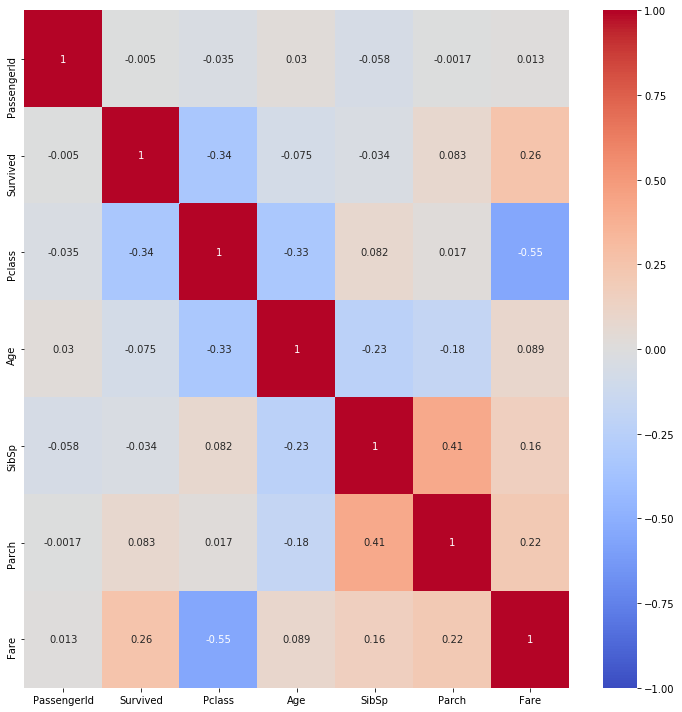

In [103]:
fig, ax = plt.subplots(figsize=(10,10))  
corr = train.corr()
ax =sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.tight_layout()
plt.show()